<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/IBM_Quantum_Simulation_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. INSTALLATION
!pip install -q qiskit qiskit-ibm-runtime qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.7/378.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.4 MB/s eta 0:00:00


In [3]:
import time
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from google.colab import userdata

print("✅ Setup complete. If this is your first time running, you might need to 'Restart Session' if plots don't show.")

✅ Setup complete. If this is your first time running, you might need to 'Restart Session' if plots don't show.


qiskit_runtime_service._discover_account:WARNING:2026-02-19 17:29:44,182: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-02-19 17:29:47,530: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


✅ Circuit designed!


qiskit_runtime_service.backends:WARNING:2026-02-19 17:29:48,043: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-19 17:29:50,619: Using instance: open-instance, plan: open


🎯 Selected Device: ibm_torino
🚀 Job Sent! ID: d6bkh47g4t5c7384fhtg
[17:29:52] Status: QUEUED
[17:30:12] Status: DONE

✨ Success! Here are your results:


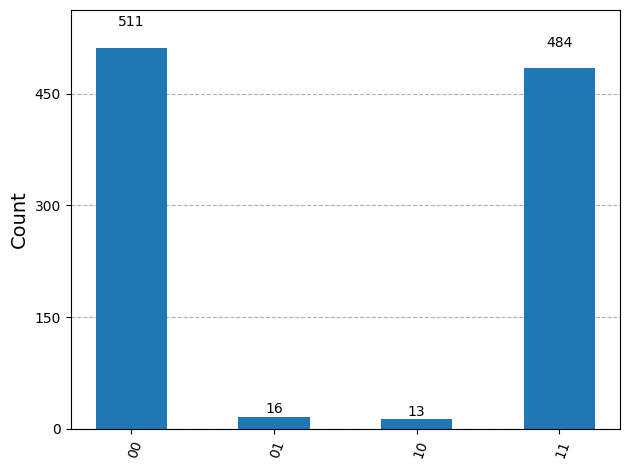

In [6]:
# --- PHASE 2: IMPORTS & CONNECTION ---
import time
from google.colab import userdata
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Connect using your Secret
token = userdata.get('IBM_TOKEN')
service = QiskitRuntimeService(channel="ibm_quantum_platform", token=token)

# --- PHASE 3: CREATE THE CIRCUIT (The "Bell State") ---
# We create 2 qubits. Goal: Make them perfectly correlated (entangled).
qc = QuantumCircuit(2)
qc.h(0)           # Put qubit 0 in a 50/50 state (Superposition)
qc.cx(0, 1)       # Flip qubit 1 ONLY IF qubit 0 is 1 (Entanglement)
qc.measure_all()  # Add measurement gates to the end
print("✅ Circuit designed!")

# --- PHASE 4: PREPARE FOR REAL HARDWARE (Transpilation) ---
# Find a real computer that isn't too busy
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)
print(f"🎯 Selected Device: {backend.name}")

# This step "rewrites" your math for that specific physical chip
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(qc)

# --- PHASE 5: RUN & MONITOR (Corrected) ---
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=1024)
print(f"🚀 Job Sent! ID: {job.job_id()}")

last_status = None
while True:
    status = job.status() # In new Qiskit, this returns a string

    if status != last_status:
        print(f"[{time.strftime('%H:%M:%S')}] Status: {status}")

        if status == "RUNNING":
            print("🔥 TOUCHDOWN: The quantum computer is now firing pulses at your qubits!")

        last_status = status

    # Check if the string matches these states
    if status in ["DONE", "ERROR", "CANCELLED"]:
        break
    time.sleep(20)

# --- PHASE 6: SEE RESULTS ---
if status == "DONE":
    print("\n✨ Success! Here are your results:")
    result = job.result()
    counts = result[0].data.meas.get_counts()
    display(plot_histogram(counts))

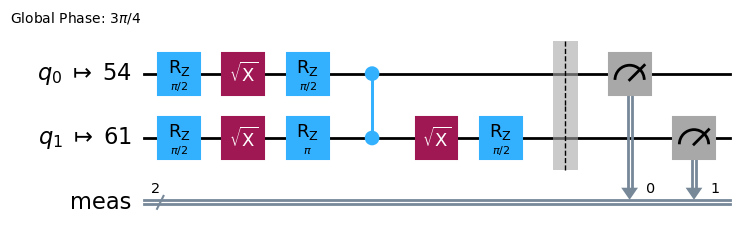

In [7]:
# Draw the circuit exactly as it ran on the hardware
isa_circuit.draw('mpl', idle_wires=False)

In [12]:
# 1. Get the summary
print(f"Details for: {backend.name}")
print(f"Number of qubits: {backend.num_qubits}")
print(f"Basis gates: {backend.operation_names}")

# 2. Get the "Gate Errors" using the correct gate name ('cz')
print("\n--- Connection Health (CZ Gates) ---")
for i in range(5):
    pair = (i, i+1)

    # Check if 'cz' exists in the target for this specific pair
    if 'cz' in backend.target and pair in backend.target['cz']:
        gate_error = backend.target['cz'][pair].error
        # Format to 4 decimal places for readability
        print(f"Connection {i}-{i+1} Gate Error: {gate_error:.4%}")
    else:
        print(f"Connection {i}-{i+1}: No physical connection on chip")

Details for: ibm_torino
Number of qubits: 133
Basis gates: ['x', 'reset', 'rz', 'delay', 'sx', 'cz', 'if_else', 'id', 'measure']

--- Connection Health (CZ Gates) ---
Connection 0-1 Gate Error: 0.2274%
Connection 1-2 Gate Error: 0.2382%
Connection 2-3 Gate Error: 0.1393%
Connection 3-4 Gate Error: 0.1739%
Connection 4-5 Gate Error: 0.2046%
